# Explore data augmentations

This notebook will be used to test different data augmentation strategies. In your config file, you can modify the augmentations by adding `data_augmentation_options`. For example, I would like to add a random RGB to gray transform with a probability of 0.2:
```
data_augmentation_options {
    random_rgb_to_gray {
    probability: 0.2
    }
```

A complete list of augmentation is provided the [`preprocessor.proto` file of the Tf Object Detection API](https://github.com/tensorflow/models/blob/master/research/object_detection/protos/preprocessor.proto).

### Helper functions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

In [22]:
def recenter_image(image):
    # ssd preprocessing
    image += [123.68, 116.779, 103.939]
    return image

def display_instances(image, bboxes, classes):
    image = recenter_image(image)
    w, h, _ = image.shape
    # resize the bboxes
    bboxes[:, [0, 2]] *= w
    bboxes[:, [1, 3]] *= h
    
    f, ax = plt.subplots(1, figsize=(5, 5))
    ax.imshow(image.astype(np.uint8))
    for bb, cl in zip(bboxes, classes):
        y1, x1, y2, x2 = bb
        rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor='r', linewidth=2)
        ax.add_patch(rec)
    plt.show()

def display_batch(batch):
    # get images, bboxes and classes
    batched_images = batch[0]['image'].numpy()
    batched_bboxes = batch[1]['groundtruth_boxes'].numpy()
    batched_classes = batch[1]['groundtruth_classes'].numpy()
    num_bboxes = batch[1]['num_groundtruth_boxes'].numpy()
    batch_size = batched_images.shape[0]
    for idx in range(batch_size):
        display_instances(batched_images[idx, ...], 
                          batched_bboxes[idx, :num_bboxes[idx], :],
                          batched_classes[idx, ...])

### Display augmentations

In [3]:
from utils import get_train_input

In [23]:
### Random RGB to Gray Augmentation
### To become familiar with using pipeline config files, firstly I set the probability of RGB to gray augmentation as 1.0.
train_dataset = get_train_input("./experiments/augmentations/pipeline_RandomRGBtoGray.config")

INFO:tensorflow:Reading unweighted datasets: ['/app/project/nd013-c1-vision-starter/data/waymo/train/segment-10444454289801298640_4360_000_4380_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-10072140764565668044_4060_000_4080_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-11126313430116606120_1439_990_1459_990_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-11070802577416161387_740_000_760_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-10391312872392849784_4099_400_4119_400_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-1208303279778032257_1360_000_1380_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-11486225968269855324_92_000_112_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starte

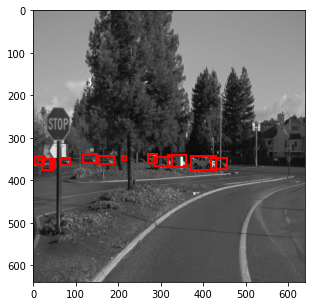

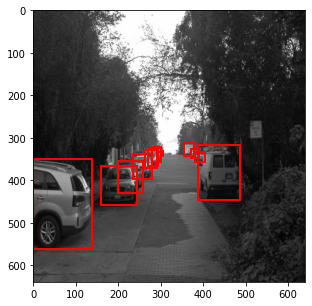

In [24]:
%matplotlib inline

for batch in train_dataset.take(1):
    display_batch(batch)

In [25]:
### Random Horizontal Flip Augmentation
### Probability of horizonal flip augmentation : 1.0
train_dataset = get_train_input("./experiments/augmentations/pipeline_RandomHorizontalFlip.config")

INFO:tensorflow:Reading unweighted datasets: ['/app/project/nd013-c1-vision-starter/data/waymo/train/segment-10444454289801298640_4360_000_4380_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-10072140764565668044_4060_000_4080_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-11126313430116606120_1439_990_1459_990_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-11070802577416161387_740_000_760_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-10391312872392849784_4099_400_4119_400_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-1208303279778032257_1360_000_1380_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-11486225968269855324_92_000_112_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starte

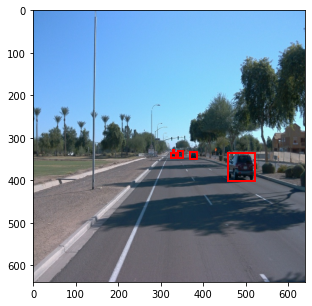

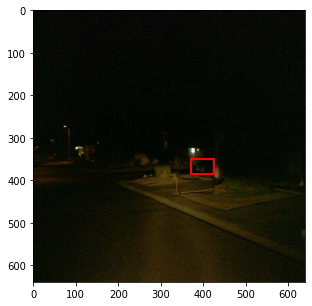

In [26]:
%matplotlib inline

for batch in train_dataset.take(1):
    display_batch(batch)

In [27]:
### Random Vertical Flip Augmentation
### Probability of vertical flip augmentation : 1.0
train_dataset = get_train_input("./experiments/augmentations/pipeline_RandomVerticalFlip.config")

INFO:tensorflow:Reading unweighted datasets: ['/app/project/nd013-c1-vision-starter/data/waymo/train/segment-10444454289801298640_4360_000_4380_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-10072140764565668044_4060_000_4080_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-11126313430116606120_1439_990_1459_990_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-11070802577416161387_740_000_760_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-10391312872392849784_4099_400_4119_400_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-1208303279778032257_1360_000_1380_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-11486225968269855324_92_000_112_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starte

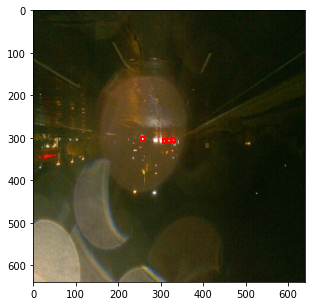

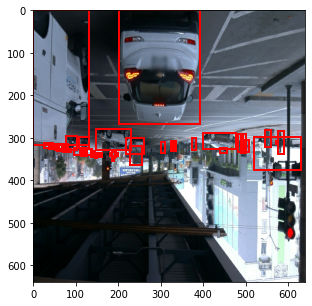

In [28]:
%matplotlib inline

for batch in train_dataset.take(1):
    display_batch(batch)

In [29]:
### Random Adjust Brightness Augmentation
### max_delta : 0.2
train_dataset = get_train_input("./experiments/augmentations/pipeline_RandomAdjustBrightness.config")

INFO:tensorflow:Reading unweighted datasets: ['/app/project/nd013-c1-vision-starter/data/waymo/train/segment-10444454289801298640_4360_000_4380_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-10072140764565668044_4060_000_4080_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-11126313430116606120_1439_990_1459_990_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-11070802577416161387_740_000_760_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-10391312872392849784_4099_400_4119_400_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-1208303279778032257_1360_000_1380_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-11486225968269855324_92_000_112_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starte

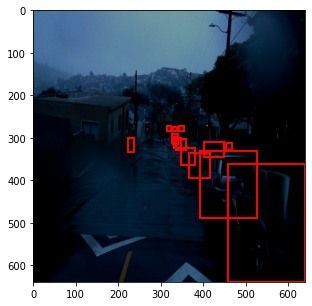

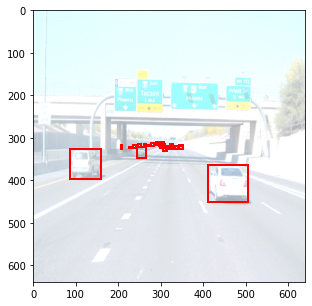

In [30]:
%matplotlib inline

for batch in train_dataset.take(1):
    display_batch(batch)

In [31]:
### Random Adjust Saturation Augmentation
### min_delta : 0.8
### max_delta : 1.25
train_dataset = get_train_input("./experiments/augmentations/pipeline_RandomAdjustSaturation.config")

INFO:tensorflow:Reading unweighted datasets: ['/app/project/nd013-c1-vision-starter/data/waymo/train/segment-10444454289801298640_4360_000_4380_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-10072140764565668044_4060_000_4080_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-11126313430116606120_1439_990_1459_990_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-11070802577416161387_740_000_760_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-10391312872392849784_4099_400_4119_400_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-1208303279778032257_1360_000_1380_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-11486225968269855324_92_000_112_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starte

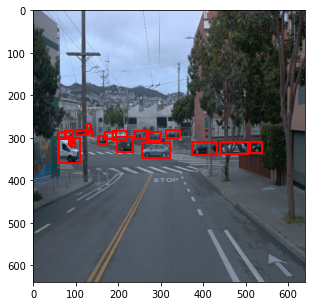

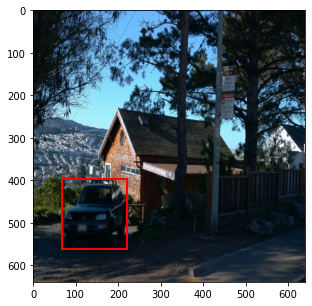

In [32]:
%matplotlib inline

for batch in train_dataset.take(1):
    display_batch(batch)

In [35]:
### Random Crop Image Augmentation
### min_object_covered : 1.0
train_dataset = get_train_input("./experiments/augmentations/pipeline_RandomCropImage.config")

INFO:tensorflow:Reading unweighted datasets: ['/app/project/nd013-c1-vision-starter/data/waymo/train/segment-10444454289801298640_4360_000_4380_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-10072140764565668044_4060_000_4080_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-11126313430116606120_1439_990_1459_990_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-11070802577416161387_740_000_760_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-10391312872392849784_4099_400_4119_400_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-1208303279778032257_1360_000_1380_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-11486225968269855324_92_000_112_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starte

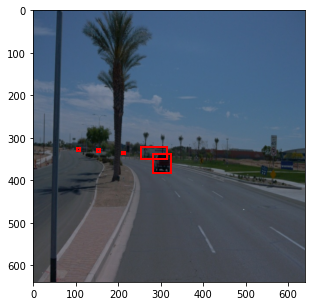

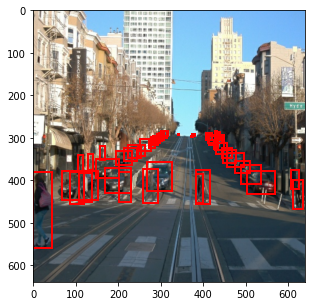

In [37]:
%matplotlib inline

for batch in train_dataset.take(1):
    display_batch(batch)

In [33]:
### Random Black Patches Augmentation
### max_black_patches : 10
train_dataset = get_train_input("./experiments/augmentations/pipeline_RandomBlackPatches.config")

INFO:tensorflow:Reading unweighted datasets: ['/app/project/nd013-c1-vision-starter/data/waymo/train/segment-10444454289801298640_4360_000_4380_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-10072140764565668044_4060_000_4080_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-11126313430116606120_1439_990_1459_990_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-11070802577416161387_740_000_760_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-10391312872392849784_4099_400_4119_400_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-1208303279778032257_1360_000_1380_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starter/data/waymo/train/segment-11486225968269855324_92_000_112_000_with_camera_labels.tfrecord', '/app/project/nd013-c1-vision-starte

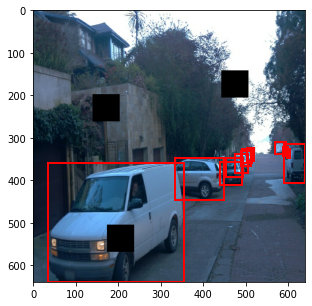

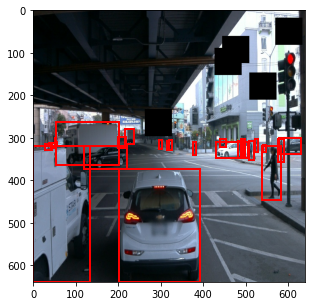

In [34]:
%matplotlib inline

for batch in train_dataset.take(1):
    display_batch(batch)